# Сборный проект

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План работы 

### Шаг 1. Изучение общей информации файлов с данными.  

### Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);  

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  

Обработайте пропуски при необходимости:   
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
- Опишите причины, которые могли привести к пропускам; 
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.  

Поясните: Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.

### Шаг 6. Общий вывод



## Описание данных


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

## Шаг 1. Изучение общей информации файлов с данными.

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from statistics import mean
from scipy import stats as st

In [2]:
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Исходный датафрейм состоит из 11 столбцов и 16715 строк. В шести столбцах (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) присутствуют пропущенные значения. Присутствуют 2 типа данных: object - 5 шт и float64 - 6 шт.

## Шаг 2. Подготовка данных

### Приведение к нижнему регистру названия столбцов.

Используем для преобразования list comprehension.

In [7]:
games_df.columns = games_df.columns.str.lower()

In [8]:
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Проведем оценку доли пропущенных значений по столбцам.

In [10]:
print('Процент пропущенных значений:')
for colunm in games_df:
    ratio = games_df[colunm].isna().mean()
    if ratio > 0:      
        print(f'в столбце {colunm} равен {ratio:.2%}')

Процент пропущенных значений:
в столбце name равен 0.01%
в столбце year_of_release равен 1.61%
в столбце genre равен 0.01%
в столбце critic_score равен 51.32%
в столбце user_score равен 40.09%
в столбце rating равен 40.48%


В столбцах name, year_of_release, genre невысокий процент пропущенных значений. Поэтому удалим строки с пропусками в этих столбцах из датафрейма.

In [11]:
games_df = games_df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

Пропуски в critic_score и user_score заменять не требуется, чтобы не исказить результаты корреляционного анализа и статистических тестов.

В столбце с оценкой пользователей user_score наибольшее количество значений с аббревиатуру 'tbd', что означает "подлежит определению". Отнесем данные значения к пропущенным.

In [12]:
games_df['user_score'].value_counts().head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

In [13]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = float('nan')

В столбце с категориальной переменной rating пропуски заменим на значение 'unknown'.

In [14]:
games_df.loc[games_df['rating'].isna(), 'rating'] = 'unknown'

### Преобразование данных в нужные типы

In [15]:
games_df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Преобразуем данные в столбце year_of_release в тип int и данных в столбце user_score в тип float.

In [16]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

In [17]:
games_df['user_score'] = games_df['user_score'].astype('float')

In [18]:
games_df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Расчёт суммарных продаж во всех регионах и запись в отдельных столбец.

In [19]:
games_df['total_sales'] = games_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [20]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод 

На этапе подготовки данных были проведены следующие шаги:  

- Приведены к нижнему регистру названия столбцов датафрейма;
- Обработаны пропуски:  
В столбцах name (название игры), year_of_release (год выпуска), genre (жанр игры) строки с пропусками были удалены.  
В столбце user_score (оценка пользователей) значения с аббревиатуру 'tbd', заменены на значения Nan,  
В столбце rating пропуски заменим на значение 'unknown'.
- Преобразованы типы данных в столбцах:   
year_of_release (год выпуска) в тип int,  
user_score (оценка пользователей ) в тип float;
- Был рассчитан и добавлен в исходный датафрейм столбец total_sales с суммарными продажами во всех регионах.

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим график зависимости количества выпускаемых игр от года.

In [21]:
count_games = games_df.groupby('year_of_release')['name'].count()

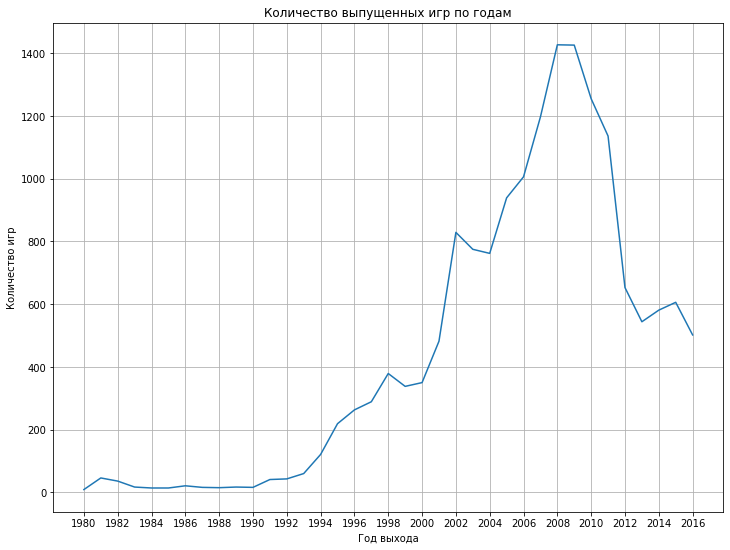

In [22]:
plt.figure(figsize=(12,9))
count_games.plot(grid=True)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.xticks(np.arange(1980, 2017, 2))
plt.show()

По графику видно, что максимум выпускаемых игр приходится на 2008-2009 года, более 1400 шт. Далее количество игр идёт на спад, до 500 игр в 2016 году. Но с 2013 по 2015 отмечался небольшой прирост количества выпускаемых игр. Самыми важными и актуальными данными будем считать данные с 2011 года, когда начался период восьмого поколения игровых приставок.

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Определим суммарные продажи в зависимости от платформы и возьмём 10 платформ с наибольшими суммарными продажами.

In [23]:
top10_platforms = games_df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)

In [24]:
top10_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Сохраним отдельно названия 10 топ платформ.

In [25]:
top10_platform_name = top10_platforms.index

In [26]:
top10_platform_name

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

И построим график распределения суммарных продаж по годам, для 10 платформ с наибольшими суммарными продажами.

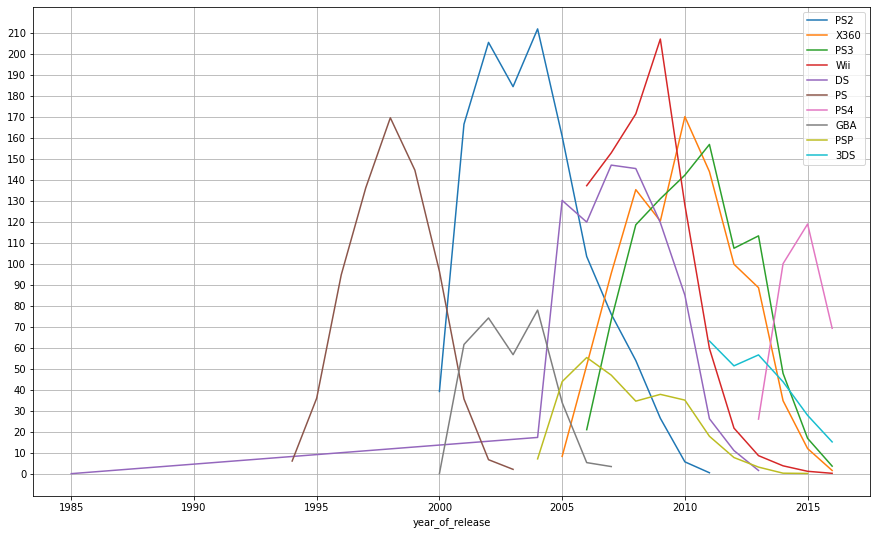

In [27]:
plt.figure(figsize=(15,9))
for platform in top10_platform_name:
    games_df[games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(grid=True, label = platform)
plt.xticks(np.arange(1985, 2017,5))
plt.yticks(np.arange(0, 220, 10))    
plt.legend()
plt.show()
None

У платформы 'DS' обнаружен выброс: присутствует игра с годом выпуска в 1985 году, хотя сама платформа Nintendo DS существовала с 2004 по 2013 год. Сделаем запрос для этого значения.

In [28]:
games_df.query('platform == "DS" and  year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Игра с названием "Strongest Tokyo University Shogi DS" вышла в 2010 году. Исправим год выпуска игры в исходном датафрейме.

In [29]:
games_df.loc[15704, 'year_of_release'] = 2010

Заново построим график.

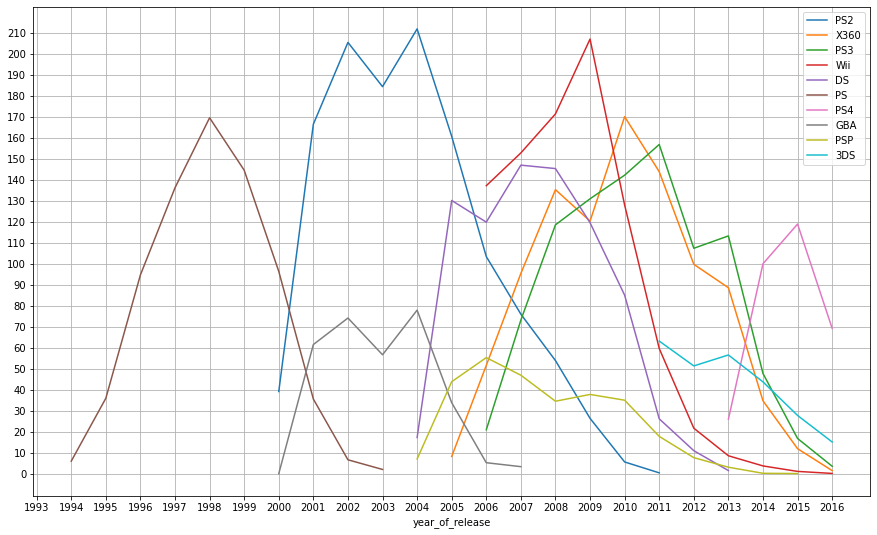

In [30]:
plt.figure(figsize=(15,9))
for platform in top10_platform_name:
    games_df[games_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(grid=True, label = platform)
plt.yticks(np.arange(0, 220, 10))    
plt.xticks(np.arange(1993, 2017, 1))
plt.legend()
None

Определим за какой характерный срок появляются новые и исчезают старые платформы (время жизни платформы).

Примем время жизни платформы как количество лет, в которых на этой платформе суммарная продажа игр была не менее 1 млн. проданных копий. Характерный срок, за который появляются новые и исчезают старые платформы определим, как среднее от времени жизни каждой платформы.

In [31]:
life = []
min_sales = 1
for name in games_df['platform'].unique():
    platform = games_df.query('platform == @name').groupby('year_of_release')['total_sales'].sum()
    life_years = 0    
    for value in platform.values:
        if value >= min_sales:
            life_years += 1
    life.append(life_years)  
mean_life = mean(life)
print('Характерный срок, за который появляются новые и исчезают старые платформы', round(mean(life)), 'лет.')

Характерный срок, за который появляются новые и исчезают старые платформы 6 лет.


### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.

Определим актуальный период как половину от характерного срока, за который появляются новые и исчезают старые платформы, потому, что половину жизненного цикла платформы растут, а вторую половину - падают. Актуальный период составляет 3 года.

Возьмём данные за актуальный период.

In [32]:
actual_df = games_df.query('year_of_release >= 2013')

In [33]:
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [34]:
actual_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

Лидируют по продажам следующие пять платформ: PS4, PS3, XOne, 3DS, X360.

Построим график изменения продаж по годам для каждой платформы.

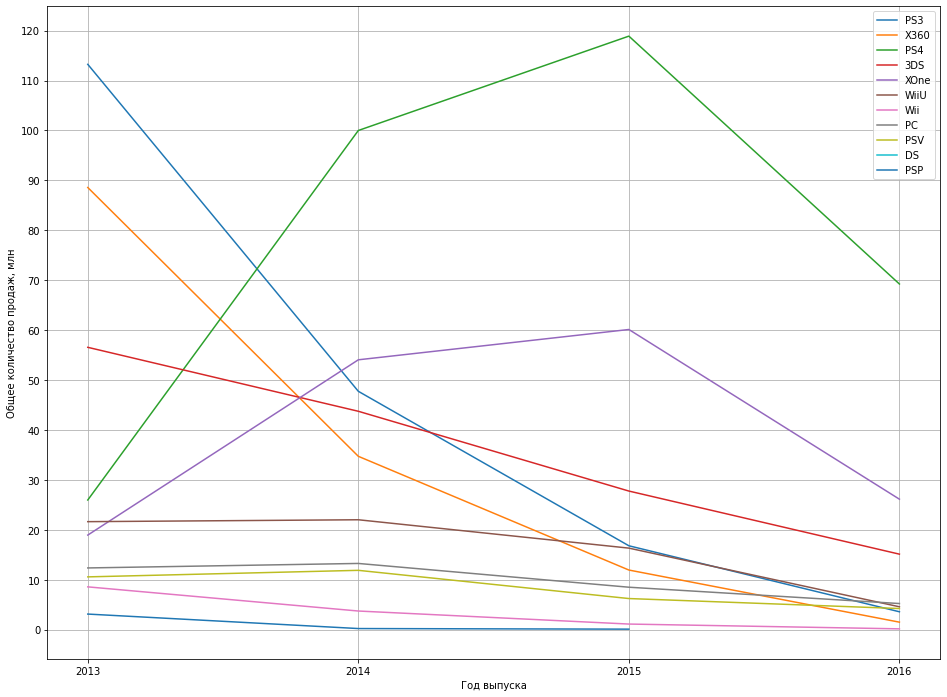

In [35]:
plt.figure(figsize=(16,12))
for platform in actual_df['platform'].unique():
    actual_df[actual_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(grid=True, label = platform)
plt.xticks(np.arange(2013, 2017,1))
plt.yticks(np.arange(0, 130, 10))    
plt.legend()
plt.ylabel('Общее количество продаж, млн')
plt.xlabel('Год выпуска')
plt.show()
None

Исходя из графика, видно, что после 2015 года, количество продаж у всех платформ снижается. Но у платформы PS4 и XOne до 2015 наблюдался рост продаж. Учитывая это, и то что данные за 2016 год могут быть неполными, выберем именно эти две платформы, как потенциально прибыльные.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

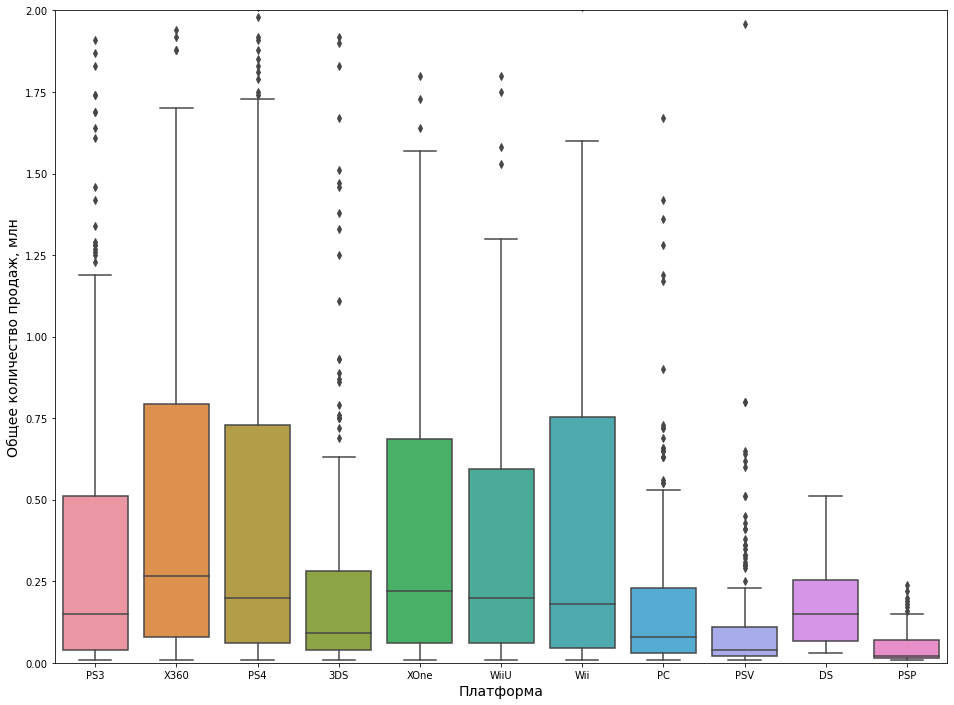

In [36]:
plt.figure(figsize=(16,12))
boxplot = sns.boxplot(x='platform', y='total_sales', data=actual_df)
boxplot.set_xlabel("Платформа", fontsize=14)
boxplot.set_ylabel("Общее количество продаж, млн", fontsize=14)
plt.ylim(0, 2)
plt.show()

In [37]:
actual_df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


На графике видно, что максимальные медианное значение по продажам у платформы - X360. Немногим уступают платформы: XOne, PS4, WiiU, Wii.  
Наибольший разброс значений у платформы PS4. Далее идут X360, Wii, WiiU.  

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Рассмотрим как влияют на продажи отзывы пользователей и критиков, на платформе PS4.

In [38]:
ps4_df = actual_df[['total_sales', 'platform', 'critic_score', 'user_score']].query('platform == "PS4"')

Построим матрицу рассеяния и матрицу корреляции.

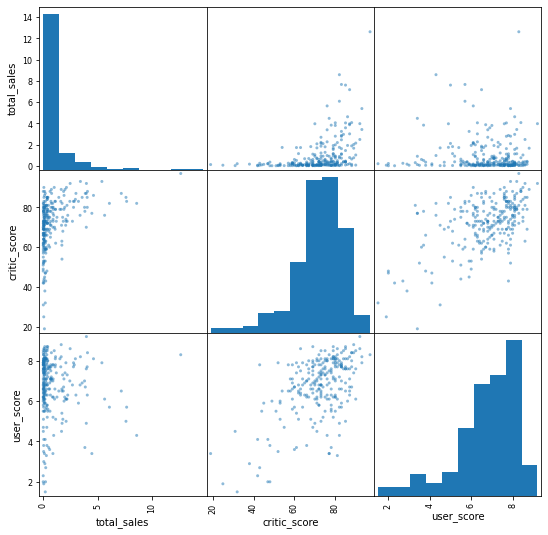

In [39]:
pd.plotting.scatter_matrix(ps4_df, figsize=(9, 9)) 
None

In [40]:
print(ps4_df.corr()) 

              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000


По матрице корреляции видно, что коэффициент корреляции между продажами и отзывами критиков равен 0.406568, а коэффициент корреляции между продажами и отзывами пользователей равен -0.031957. Это означает, что существует линейная положительная связь между продажами и отзывами критиков, однако не слишком сильная. А линейная связь между продажами и отзывами пользователей, очень слабая либо отсутствует вовсе.

### Соотнесите выводы с продажами игр на других платформах.

Рассмотрим как влияют на продажи отзывы пользователей и критиков, на платформах: XOne, PS3, X360, 3DS, WiiU.

In [41]:
other_platform = ['XOne', 'PS3', 'X360', '3DS', 'WiiU']

Построим матрицу корреляции по выбранным платформам.

In [42]:
for platform in other_platform:
    print()
    print(platform)
    platform_df = actual_df[['total_sales', 'platform', 'critic_score', 'user_score']].query('platform == @platform')
    print(platform_df.corr())


XOne
              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000

PS3
              total_sales  critic_score  user_score
total_sales      1.000000      0.334285    0.002394
critic_score     0.334285      1.000000    0.599920
user_score       0.002394      0.599920    1.000000

X360
              total_sales  critic_score  user_score
total_sales      1.000000      0.350345   -0.011742
critic_score     0.350345      1.000000    0.520946
user_score      -0.011742      0.520946    1.000000

3DS
              total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    0.769536
user_score       0.241504      0.769536    1.000000

WiiU
              total_sales  critic_score  user_score
total_sales      1.000000      0.376415    0.419330
critic_score     0.376415      1.000

По другим платформам отзывы критиков влияют на продажи похожим образом, что на платформе PS4. Коэффициенты корреляции разнятся от 0.334285 у PS3 до 0.416998 у XOne.  
У платформ 3DS и WiiU отмечается несильная линейная положительная связь между продажами и отзывами пользователей. Коэффициенты коррелиции 0.241504 и 0.419330 соответственно. Эти платформы объединяет производитель - Nintendo. Можно предположить, то что покупатели игр от Nintendo, обращают внимание не только на оценки от критиков, но и на оценки от пользователей.  
У остальных платформ эта связь на том же нулевом уровне, что и у PS4.



<div class="alert alert-sucess">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 
    
Все полученные результаты верны, отсутствие корреляцией между отзывами клиентов и продажами подчеркнута правильно, графики оформлены аккуратно, метод .corr() использован.


    
</div>

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим гистограмму и диаграмму размаха распределения общего количества продаж игр от жанра.

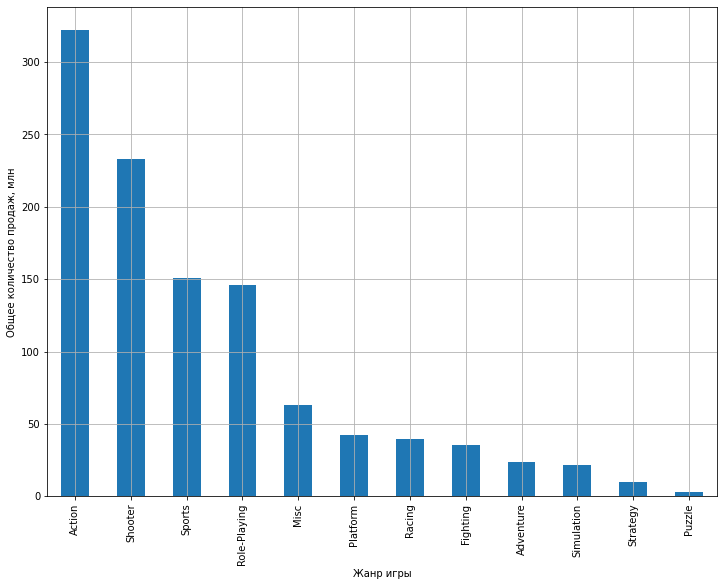

In [43]:
actual_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,9), grid=True)
plt.xlabel('Жанр игры')
plt.ylabel('Общее количество продаж, млн')
plt.show()

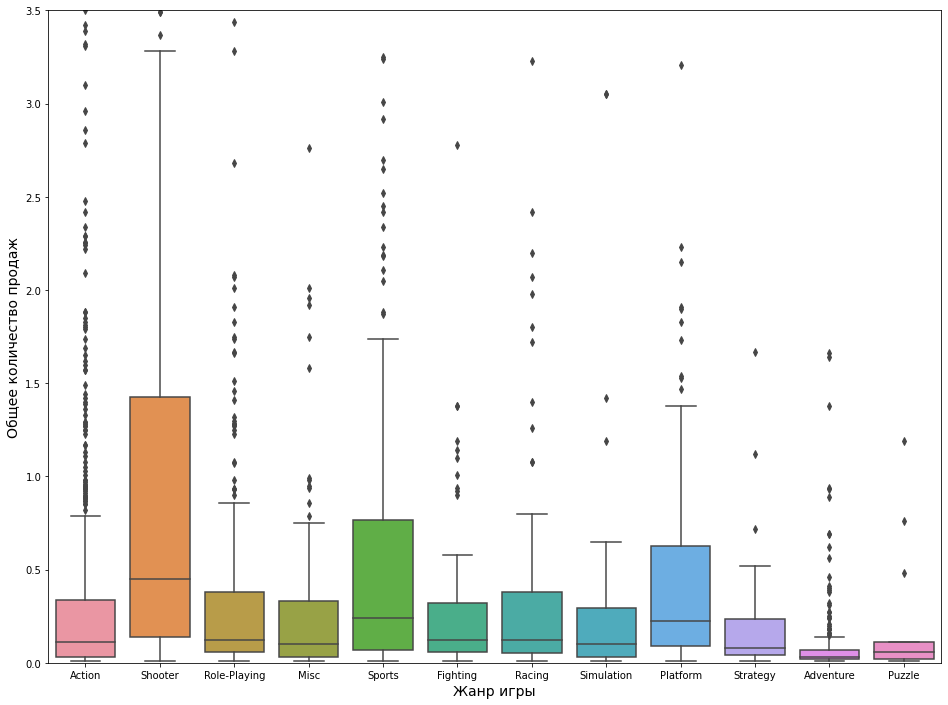

In [44]:
plt.figure(figsize=(16,12))
boxplot1 = sns.boxplot(x='genre', y='total_sales', data=actual_df)
boxplot1.set_xlabel("Жанр игры", fontsize=14)
boxplot1.set_ylabel("Общее количество продаж", fontsize=14)
plt.ylim(0, 3.5)
plt.show()

In [45]:
actual_df.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


У лидера по продажам - жанра Action самое большое количество наименований игр - 766 шт. и самое высокое максимальное значение проданных копий - 21,05 млн. Медианное значние - 0.110 млн. копий.  
У второго по количеству продаж, жанру Shooter, меньшее количество наименований игр - 187 шт., но большее медианное значение, чем у жанра Action, 0.450 млн. копий.  
У последнего места - жанра Puzzle, наименьшее количество наименований игр - 17 шт., и наименьшее максимальное значение проданных копий - 1.19 млн.   

### Вывод

На этапе исследовательского анализа данных было выполнено:
- Построен график зависимости количества выпускаемых игр от года. Максимум выпускаемых игр приходится на 2008-2009 года;  
- Определены топ-10 платформ с наибольшими суммарными продажами. Вычислен характерный срок, за который появляются новые и исчезают старые платформы, который составил 6 лет;
- Был отфильтрован исходный датафрейм по актуальному периоду, который составил 3 года;
- Были определены платформы, которые лидировали по продажам за актуальный период. Выбраны две потенциально прибыльных платформ - PS4 и XOne;
- Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Построены диаграммы рассеяния и посчитаны корреляции между отзывами и продажами. Была выявлена линейная несильная положительная связь между продажами и отзывами критиков. Линейная связь между продажами и отзывами пользователей, очень слабая либо отсутствует вовсе, кроме платформ производителя Nintendo, у которых также выявлена линейная несильная положительная связь между отзывами и продажами;
- Изучено общее распределение игр по жанрам. Лидеры продаж - жанры Action и Shooter. Последние места занимают жанры Strategy и Puzzle.

## Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определение топ-5 самых популярных платформ по регионам.

Создадим список с продажами игр по регионам NA, EU, JP.

In [46]:
sales_regions = ['na_sales','eu_sales','jp_sales']

Для каждого региона построим круговые диаграммы распределения продаж игр для топ-5 самых популярных платформ.

Топ-5 cамыx популярныx платформ для NA региона:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Топ-5 cамыx популярныx платформ для EU региона:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Топ-5 cамыx популярныx платформ для JP региона:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64



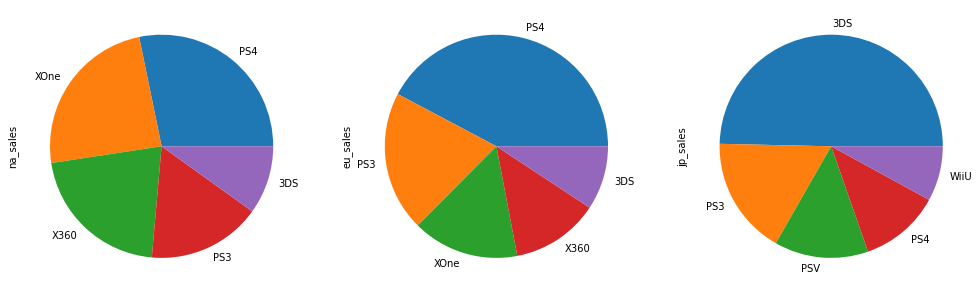

In [47]:
fig, axis = plt.subplots(1, 3, figsize=(17,8))

for j in range(len(sales_regions)): 
    top_platform = actual_df.groupby(['platform'])[sales_regions[j]].sum().sort_values(ascending=False).head()
    top_platform.plot.pie(ax=axis[j])
    print('Топ-5 cамыx популярныx платформ для', sales_regions[j][:2].upper(), 'региона:')
    print(top_platform) 
    print() 
    
plt.show()

В Северной Америке и Европе наиболее популярна платформа PS4. Также в Северной Америке сильны позиции приставок Xbox 360 и Xbox One, выпущенных американской компанией Microsoft.  
В Японии все топ-5 платформ от японских производитедей Nintendo и Sony. Самая популярная из которых, портативная платформа Nintendo 3DS.

### Определение топ-5 самых популярных жанров по регионам.

Для каждого региона построим круговые диаграммы распределения продаж игр для топ-5 самых популярных жанров.

Топ-5 cамыx популярныx жанров для NA региона:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Топ-5 cамыx популярныx жанров для EU региона:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Топ-5 cамыx популярныx жанров для JP региона:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64



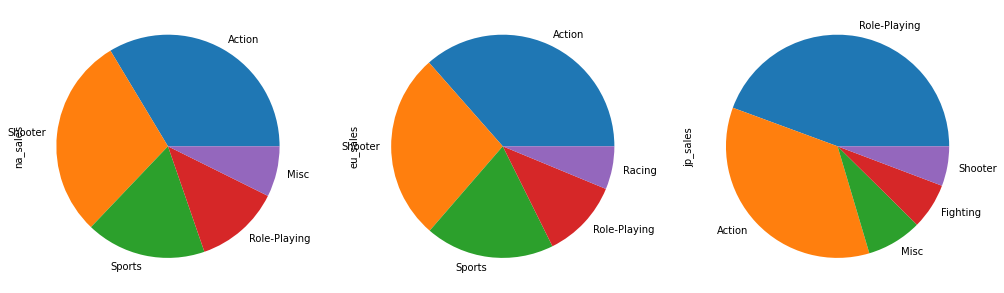

In [48]:
fig, axis = plt.subplots(1, 3, figsize=(17,8))

for j in range(len(sales_regions)): 
    top_platform = actual_df.groupby(['genre'])[sales_regions[j]].sum().sort_values(ascending=False).head()
    top_platform.plot.pie(ax=axis[j])
    print('Топ-5 cамыx популярныx жанров для', sales_regions[j][:2].upper(), 'региона:')
    print(top_platform) 
    print() 
    
plt.show()

Схожи предпочтения в Северной Америке и Европе и по жанрам игр. Первые четыре позиции совпадают - Action, Shooter, Sports, Role-Playing.  
В Японии лидируют два жанра Role-Playing и Action.

### Определение наличия влияния рейтинга ESRB на продажи в отдельном регионе.

Построим гистограмму продаж в зависимости от рейтинга ESRB по каждому из регионов.

<AxesSubplot:xlabel='rating'>

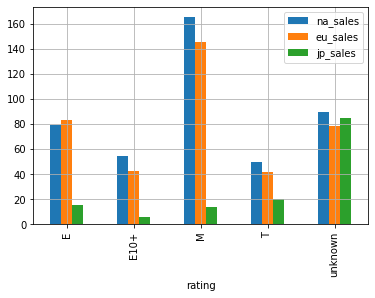

In [49]:
actual_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot.bar(grid=True)

По гистограмме видно, что в североамериканском (na) и европейском (eu) регионах наибольшей популярностью пользуются игры категории «M» («Mature) — «Для взрослых». В японском регионе (jp) больше всего продаж игр категории «T» («Teen») — «Подросткам».

### Вывод

На данном этапе составлен портрет пользователя каждого региона.  
Для японского региона это пользователь, который предпочитает игры в жанре Role-Playing и Action на платформа Nintendo 3DS с рейтингом ESRB «T» - «Подросткам».  
Для Северной Америки и Европы портрет пользователя совпадает это человек, который предпочитает игры в жанре Action и Shooter на платформе PS4 с рейтингом «M» — «Для взрослых». Единственное отличие - в Северной Америке также популярна платформа Xbox.

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую H0 и альтернативную H1 гипотезы:  
H0 — Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1 — Средние пользовательские рейтинги платформ Xbox One и PC разные.  
Пороговое значение примем: α = 0.05

Применим метод scipy.stats.ttest_ind (array1, array2, equal_var) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [50]:
platform_df = actual_df[['platform', 'user_score']]

In [51]:
xone_df = platform_df.query('platform == "XOne"')['user_score'].dropna()

In [52]:
pc_df = platform_df.query('platform == "PC"')['user_score'].dropna()

In [53]:
alpha = 0.05

results = st.ttest_ind(
    xone_df, 
    pc_df)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу.


Следовательно, средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую H0 и альтернативную H1 гипотезы:  
H0 — Средние пользовательские рейтинги жанров Action и Sports разные.  
H1 — Средние пользовательские рейтинги жанров Action и Sports одинаковые.   
Пороговое значение примем: α = 0.05

Применим метод scipy.stats.ttest_ind (array1, array2, equal_var) для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [54]:
genre_df = actual_df[['genre', 'user_score']]

In [55]:
action_df = genre_df.query('genre == "Action"')['user_score'].dropna()

In [56]:
sports_df = genre_df.query('genre == "Sports"')['user_score'].dropna()

In [57]:
alpha = 0.05

results = st.ttest_ind(
    action_df, 
    sports_df)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу.


Отвергаем нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports статистически значимо не различаются.

### Вывод

Проверены 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
Гипотезу отвергнуть не удалось. 
2. Средние пользовательские рейтинги жанров Action и Sports разные.
Гипотеза не подтвердилась. 

Для анализа был проведен t-тест с помощью метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind.


## Oбщий вывод

В ходе проекта были изучены исторические данные до 2016 года, о продажах игр, оценки пользователей и экспертов, жанры и платформы. Были выявлены определяющие успешность игры закономерности и определены потенциально популярные игровые платформы. Анализ данных состоял из следующих этапов:
- Изучена общая информация файлов с данными.  
 - Исходный датафрейм состоит из 11 столбцов и 16715 строк. В шести столбцах (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) присутствуют пропущенные значения. Присутствуют 2 типа данных: object - 5 шт и float64 - 6 шт.  
 
 
- Проведена подготовка данных.  
 - Приведены к нижнему регистру названия столбцов датафрейма;
 - Обработаны пропуски:
   - В столбцах name (название игры), year_of_release (год выпуска), genre (жанр игры) строки с пропусками были удалены.
   - В столбце user_score (оценка пользователей) значения с аббревиатуру 'tbd', заменены на значения Nan,
   - В столбце rating пропуски заменим на значение 'unknown'.
 - Преобразованы типы данных в столбцах:
   - year_of_release (год выпуска) в тип int,
   - user_score (оценка пользователей ) в тип float;
  - Был рассчитан и добавлен в исходный датафрейм столбец total_sales с суммарными продажами во всех регионах.  
  
  
- Проведен исследовательский анализ данных.  
 - Построен график зависимости количества выпускаемых игр от года. Максимум выпускаемых игр приходится на 2008-2009 года;
 - Определены топ-10 платформ с наибольшими суммарными продажами. Вычислен характерный срок, за который появляются новые и исчезают старые платформы, который составил 6 лет;
 - Был отфильтрован исходный датафрейм по актуальному периоду, который составил 3 года;
 - Были определены платформы, которые лидировали по продажам за актуальный период. Выбраны две потенциально прибыльных платформ - PS4 и XOne;
 - Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
 - Построены диаграммы рассеяния и посчитаны корреляции между отзывами и продажами. Была выявлена линейная несильная положительная связь между продажами и отзывами критиков. Линейная связь между продажами и отзывами пользователей, очень слабая либо отсутствует вовсе, кроме платформ производителя Nintendo, у которых также выявлена линейная несильная положительная связь между отзывами и продажами;
 - Изучено общее распределение игр по жанрам. Лидеры продаж - жанры Action и Shooter. Последние места занимают жанры Strategy и Puzzle.
 
 
- Составлен портрет пользователя каждого региона.
 - Для Японии это пользователь, который предпочитает игры в жанре Role-Playing и Action на платформа Nintendo 3DS с рейтингом ESRB «T» - «Подросткам».
 - Для Северной Америки и Европы портрет пользователя совпадает это человек, который предпочитает игры в жанре Action и Shooter на платформе PS4 с рейтингом «M» — «Для взрослых». Единственное отличие - в Северной Америке также популярна платформа Xbox.  
 
 
- Проверены 2 гипотезы.
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотезу отвергнуть не удалось.
 - Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза не подтвердилась.
